In [11]:
import os 
import random 
import numpy as np
import matplotlib.pyplot as plt
import cv2 #to read image file
from tqdm import tqdm

In [2]:
DATADIR = 'F:\AIUB\9\CVPR\Catdog'

TRAIN_DATADIR = os.path.join(DATADIR,'training_set') 
TEST_DATADIR = os.path.join(DATADIR, 'test_set')
print(TRAIN_DATADIR)

F:\AIUB\9\CVPR\Catdog\training_set


In [6]:
# creating list for accessing catagories of images
CATEGORIES = []
for c in os.listdir(TRAIN_DATADIR):  
    CATEGORIES.append(c)
print(CATEGORIES)

['cats', 'dogs']


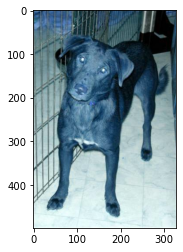

In [4]:
#accessing each image 
tmp = 0
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, c)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img)) 
        plt.imshow(img_arr)
        break;

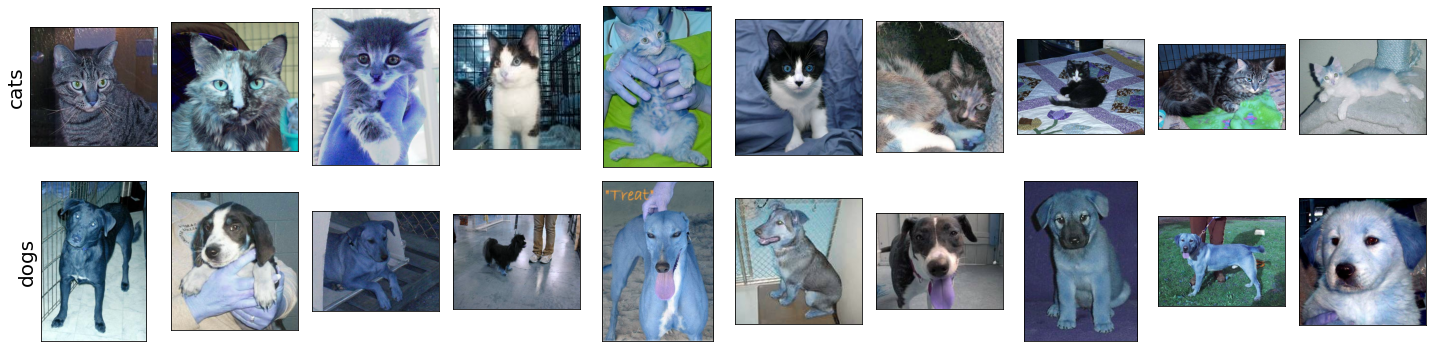

In [8]:
plt.figure(figsize=(20,5))
tmp=0
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, c)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10, tmp+1)
        plt.imshow(img_arr)
        plt.xticks([])
        plt.yticks([])
        if tmp%10 == 0:
            plt.ylabel(c, color= 'black', fontsize=20)
        tmp +=1
        if tmp%10 == 0:
            break;
plt.tight_layout()
plt.show()

In [9]:
train_data = []
validation_data = []
test_data = []
IMG_SIZE = 227

In [15]:
#preprocessing data
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr = cv2.imread(os.path.join(path,img))
            img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            train_data.append(img_resized, class_num)
        except Exception as e:
            pass


100%|██████████| 4006/4006 [00:07<00:00, 504.77it/s]

4000


In [16]:
#preprocessing data
for c in CATEGORIES:
    path = os.path.join(TEST_DATADIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr = cv2.imread(os.path.join(path,img))
            img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            test_data.append(img_resized, class_num)
        except Exception as e:
            pass

100%|██████████| 1012/1012 [00:07<00:00, 133.62it/s]


In [17]:
random.shuffle(train_data)
random.shuffle(test_data)

In [ ]:
X_train = []
Y_train = []
for img, label in enumerate(train_data):
    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE,3)
Y_train = np.array(Y_train)

print(X_train.shape, Y_train.shape)